In [ ]:
#packages needed 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn



In [ ]:
#reading the csv data 
df_CE802P2 = pd.read_csv('/content/CE802_P2_Data.csv')
df_CE802P2.head(10)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,4.92,-13.23,330,13.22,-5.51,41.10,16.72,-56.98,-748.72,20,9.75,259.66,8.00,-0.35,4.76,False
1,-9.33,-27.72,3,12.78,-9.12,5.31,9.90,-30.98,-436.72,2,-1.56,131.66,0.76,1.79,NaN,False
2,-15.09,-26.28,6,13.54,-7.75,5.67,9.93,-34.98,-482.72,2,-2.58,63.66,0.64,2.02,NaN,True
3,-18.09,-24.60,30,13.28,-8.61,3.51,10.02,-30.98,-414.72,2,-7.08,133.66,0.57,1.98,NaN,True
4,6.12,-8.64,300,14.94,-1.97,29.40,19.32,-36.98,-428.72,20,9.09,229.66,6.70,-3.83,NaN,True
5,6.72,-12.90,325,11.54,-3.94,16.50,14.82,-76.98,-408.72,20,14.55,39.66,9.25,-3.27,7.02,True
6,-8.61,-23.79,44,12.48,-7.29,0.96,10.24,-34.98,-468.72,2,-0.36,95.66,0.56,1.98,6.53,True
7,5.85,-9.39,390,13.68,-2.43,34.35,18.27,-36.98,-588.72,20,13.56,109.66,5.50,-3.84,NaN,False
8,-13.80,-27.00,25,11.72,-9.73,5.58,9.47,-34.98,-450.72,2,-0.27,83.66,0.56,4.96,NaN,False
9,4.02,-11.46,95,10.38,-6.33,30.60,17.22,-56.98,-758.72,20,12.36,139.66,5.70,-2.87,NaN,True


In [ ]:
#displaying the structure of the csv data 
df_CE802P2.describe

<bound method NDFrame.describe of          F1     F2   F3     F4    F5  ...     F12   F13   F14   F15  Class
0      4.92 -13.23  330  13.22 -5.51  ...  259.66  8.00 -0.35  4.76  False
1     -9.33 -27.72    3  12.78 -9.12  ...  131.66  0.76  1.79   NaN  False
2    -15.09 -26.28    6  13.54 -7.75  ...   63.66  0.64  2.02   NaN   True
3    -18.09 -24.60   30  13.28 -8.61  ...  133.66  0.57  1.98   NaN   True
4      6.12  -8.64  300  14.94 -1.97  ...  229.66  6.70 -3.83   NaN   True
...     ...    ...  ...    ...   ...  ...     ...   ...   ...   ...    ...
1495  -1.35 -20.76   40  11.58 -8.75  ...  159.66  5.90  3.54   NaN  False
1496 -12.90 -25.80    8  12.38 -9.51  ...   75.66  0.54  3.84   NaN  False
1497  -3.78 -14.97  155   9.20 -4.18  ...  -50.34  6.15 -0.76  4.42  False
1498   1.38 -14.97  190  13.36 -6.31  ...  269.66  8.30 -2.63  3.29  False
1499   8.16  -7.86  330  16.14 -3.18  ...  219.66  7.00 -3.54   NaN  False

[1500 rows x 16 columns]>

In [ ]:
#checking the format of data in the dataframe
df_CE802P2.dtypes

F1       float64
F2       float64
F3         int64
F4       float64
F5       float64
F6       float64
F7       float64
F8       float64
F9       float64
F10        int64
F11      float64
F12      float64
F13      float64
F14      float64
F15      float64
Class       bool
dtype: object

In [ ]:
#replacing class catagorical varaiables with integer 1 = True 0 = False 
df_CE802P2['Class'] = df_CE802P2['Class'].replace([True, False], [1, 0])
print(df_CE802P2.head(10))
df_CE802P2.dtypes

      F1     F2   F3     F4    F5  ...     F12   F13   F14   F15  Class
0   4.92 -13.23  330  13.22 -5.51  ...  259.66  8.00 -0.35  4.76      0
1  -9.33 -27.72    3  12.78 -9.12  ...  131.66  0.76  1.79   NaN      0
2 -15.09 -26.28    6  13.54 -7.75  ...   63.66  0.64  2.02   NaN      1
3 -18.09 -24.60   30  13.28 -8.61  ...  133.66  0.57  1.98   NaN      1
4   6.12  -8.64  300  14.94 -1.97  ...  229.66  6.70 -3.83   NaN      1
5   6.72 -12.90  325  11.54 -3.94  ...   39.66  9.25 -3.27  7.02      1
6  -8.61 -23.79   44  12.48 -7.29  ...   95.66  0.56  1.98  6.53      1
7   5.85  -9.39  390  13.68 -2.43  ...  109.66  5.50 -3.84   NaN      0
8 -13.80 -27.00   25  11.72 -9.73  ...   83.66  0.56  4.96   NaN      0
9   4.02 -11.46   95  10.38 -6.33  ...  139.66  5.70 -2.87   NaN      1

[10 rows x 16 columns]


F1       float64
F2       float64
F3         int64
F4       float64
F5       float64
F6       float64
F7       float64
F8       float64
F9       float64
F10        int64
F11      float64
F12      float64
F13      float64
F14      float64
F15      float64
Class      int64
dtype: object

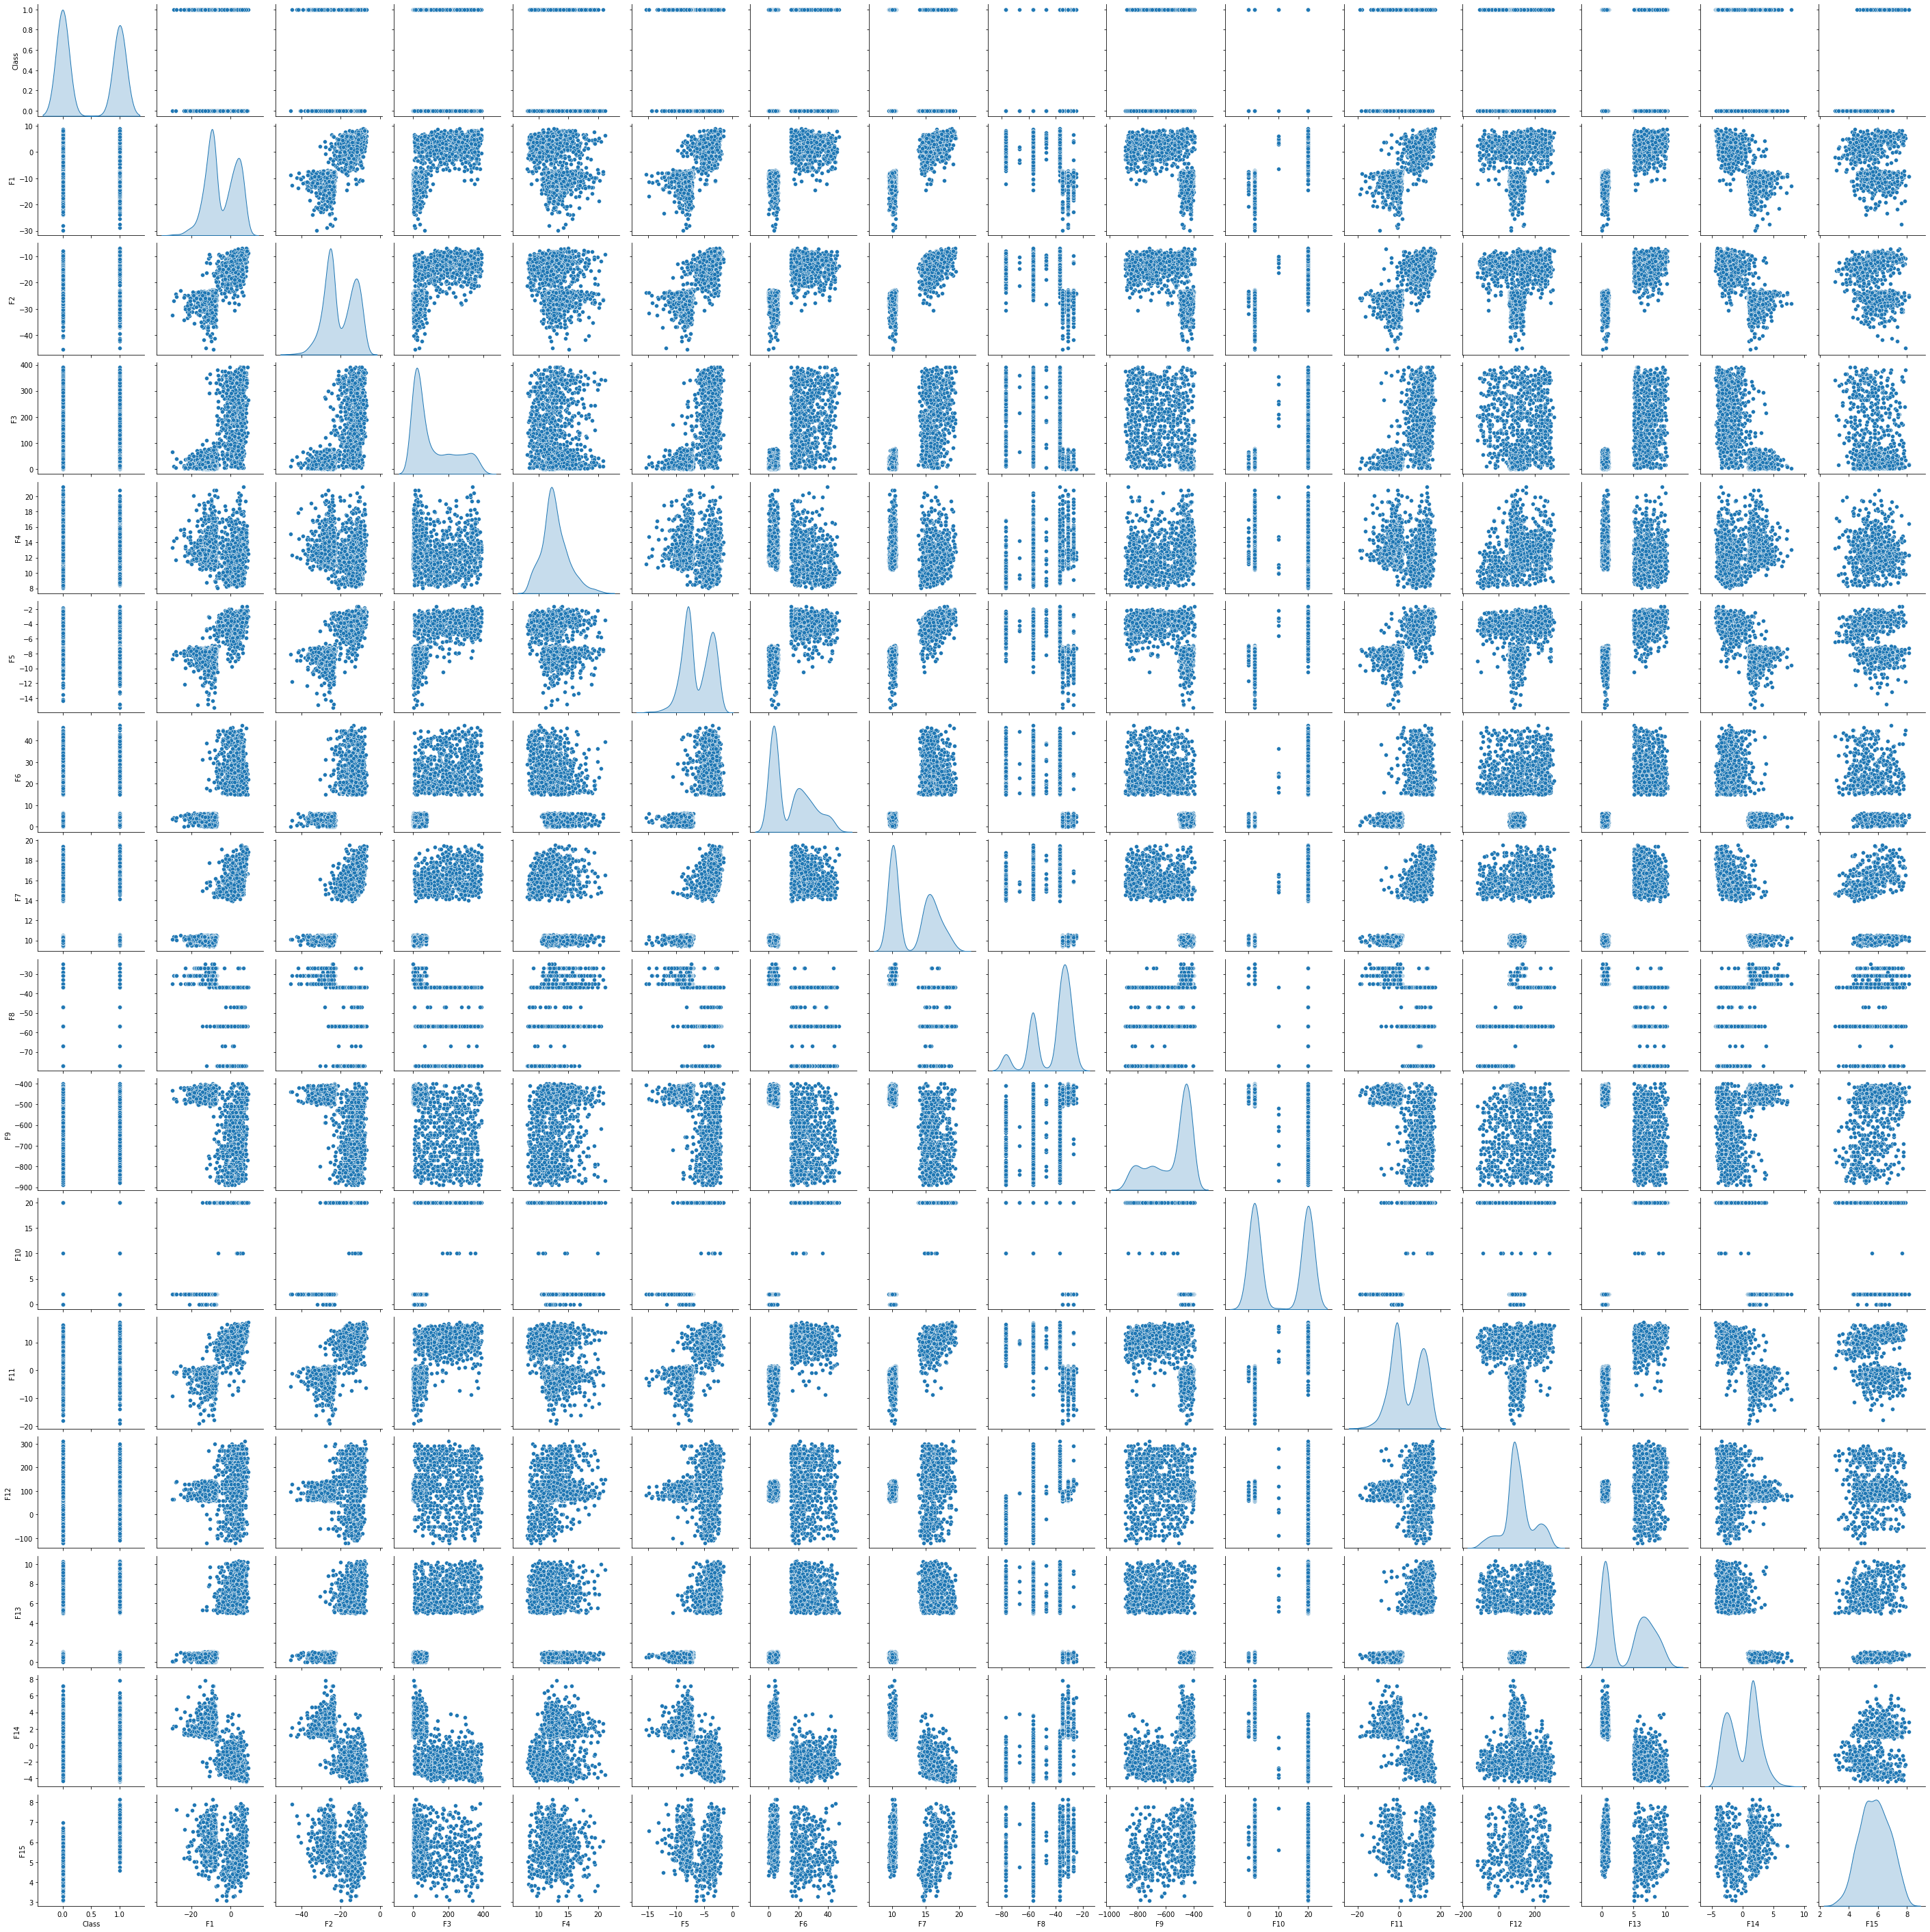

In [ ]:
#visulising the data to check for false predictors 
sns.pairplot(df_CE802P2[['Class', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9',  'F10', 'F11', 'F12', 'F13', 'F14', 'F15']], diag_kind='kde')

In [ ]:
#creating a correlation table of the features and Class
corr_tab = df_CE802P2.loc[:, ['Class', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9',  'F10', 'F11', 'F12', 'F13', 'F14', 'F15']].corr()
corr_tab 

,Class,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15
Class,1.000000,-0.079108,-0.057144,-0.152249,-0.024064,-0.068795,-0.191255,-0.080522,0.144057,0.266599,-0.203649,-0.058308,-0.050738,-0.135190,0.079035,0.729540
F1,-0.079108,1.000000,0.813816,0.679250,-0.167082,0.804192,0.755101,0.884842,-0.630234,-0.599455,0.873724,0.826213,0.215099,0.861852,-0.802995,-0.161148
F2,-0.057144,0.813816,1.000000,0.690864,-0.176375,0.804545,0.763419,0.883349,-0.614027,-0.614240,0.868528,0.809473,0.205886,0.863434,-0.791322,-0.175460
F3,-0.152249,0.679250,0.690864,1.000000,-0.012291,0.682649,0.706639,0.755121,-0.600153,-0.540342,0.742369,0.675264,0.069969,0.733312,-0.676389,-0.239084
F4,-0.024064,-0.167082,-0.176375,-0.012291,1.000000,-0.166323,-0.276405,-0.182643,0.336565,0.204661,-0.229981,-0.181686,0.251693,-0.201330,0.170702,-0.019036
F5,-0.068795,0.804192,0.804545,0.682649,-0.166323,1.000000,0.750944,0.873595,-0.611943,-0.611131,0.863027,0.807678,0.207789,0.855536,-0.794590,-0.173578
F6,-0.191255,0.755101,0.763419,0.706639,-0.276405,0.750944,1.000000,0.837365,-0.637508,-0.672167,0.888977,0.762769,0.194739,0.834246,-0.753287,-0.297380
F7,-0.080522,0.884842,0.883349,0.755121,-0.182643,0.873595,0.837365,1.000000,-0.681754,-0.727545,0.956640,0.887500,0.224060,0.906307,-0.873428,-0.195861
F8,0.144057,-0.630234,-0.614027,-0.600153,0.336565,-0.611943,-0.637508,-0.681754,1.000000,0.599113,-0.738079,-0.637027,0.238974,-0.697186,0.620092,0.230740
F9,0.266599,-0.599455,-0.614240,-0.540342,0.204661,-0.611131,-0.672167,-0.727545,0.599113,1.000000,-0.744822,-0.619599,-0.088436,-0.721849,0.595590,0.363370


In [ ]:
#seperating the prediction features from the classification feature 

X = df_CE802P2.loc[:, df_CE802P2.columns != 'Class'].to_numpy()
y = df_CE802P2.loc[:, 'Class'].to_numpy()
print(X.shape, y.shape)

(1500, 15) (1500,)


In [ ]:
#Cross validation, data preprocessing and normalisation 
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import GridSearchCV

#importing necassarry model
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

#accuracy scores of all the models
DTC_scores = []
LR_scores =[]
KNN_scores = []
SVM_scores = []

#setting up stratified k-fold
strat_k_fold = StratifiedKFold(n_splits=10)

#setting decision tree
LoanTree = DecisionTreeClassifier(max_depth = 4)

#setting up logistic regression
logitmod = LogisticRegression()


#setting up KNN model and parameters 
knn = KNeighborsClassifier()
f1 = make_scorer(f1_score, average = 'binary', pos_label = 1)
param_grid = {'n_neighbors': np.arange(1, 25)}
knn_cv = GridSearchCV(knn, param_grid, cv=10, scoring=f1)

#setting up SVM model
clf = svm.SVC(kernel='linear') # Linear Kernel


#normalising, adding mean and splitting data into train/test
X_copy = X.copy() # We make a copy of our data to avoid overwriting
for train_indices, test_indices in strat_k_fold.split(X, y):
    mean = np.nanmean(X_copy[train_indices, 14])
    X[np.isnan(X_copy[:,14]), 14] = mean # We substitute the missing values for the mean
    stan_scal = StandardScaler() #normalising the data
    stan_scal.fit(X[train_indices, :]) 
    X_train = stan_scal.transform(X[train_indices, :])
    X_test = stan_scal.transform(X[test_indices, :])
    y_train = y[train_indices]
    y_test = y[test_indices]

    #fitting and obtaining scores of each model 
    LoanTree.fit(X_train, y_train)
    DTC_scores.append(LoanTree.score(X_test, y_test))

    logitmod.fit(X_train, y_train) 
    LR_scores.append(logitmod.score(X_test, y_test))

    knn_cv.fit(X_train, y_train)
    KNN_scores.append(knn_cv.score(X_test, y_test))

    clf.fit(X_train, y_train)
    SVM_scores.append(clf.score(X_test, y_test))


#printing out mean cross-val accuracy scores to 4 significant figures 
print('Decision Tree Classifier Accuracy: %.4f' % (np.mean(DTC_scores)))
print('Logistic Regression Accuracy: %.4f' % (np.mean(LR_scores)))
print('KNN Classifier Accuracy: %.4f' % (np.mean(KNN_scores)))
print('SVM Classifier Accuracy: %.4f' % (np.mean(SVM_scores)))

Decision Tree Classifier Accuracy: 0.7753
Logistic Regression Accuracy: 0.8413
KNN Classifier Accuracy: 0.7155
SVM Classifier Accuracy: 0.8533


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


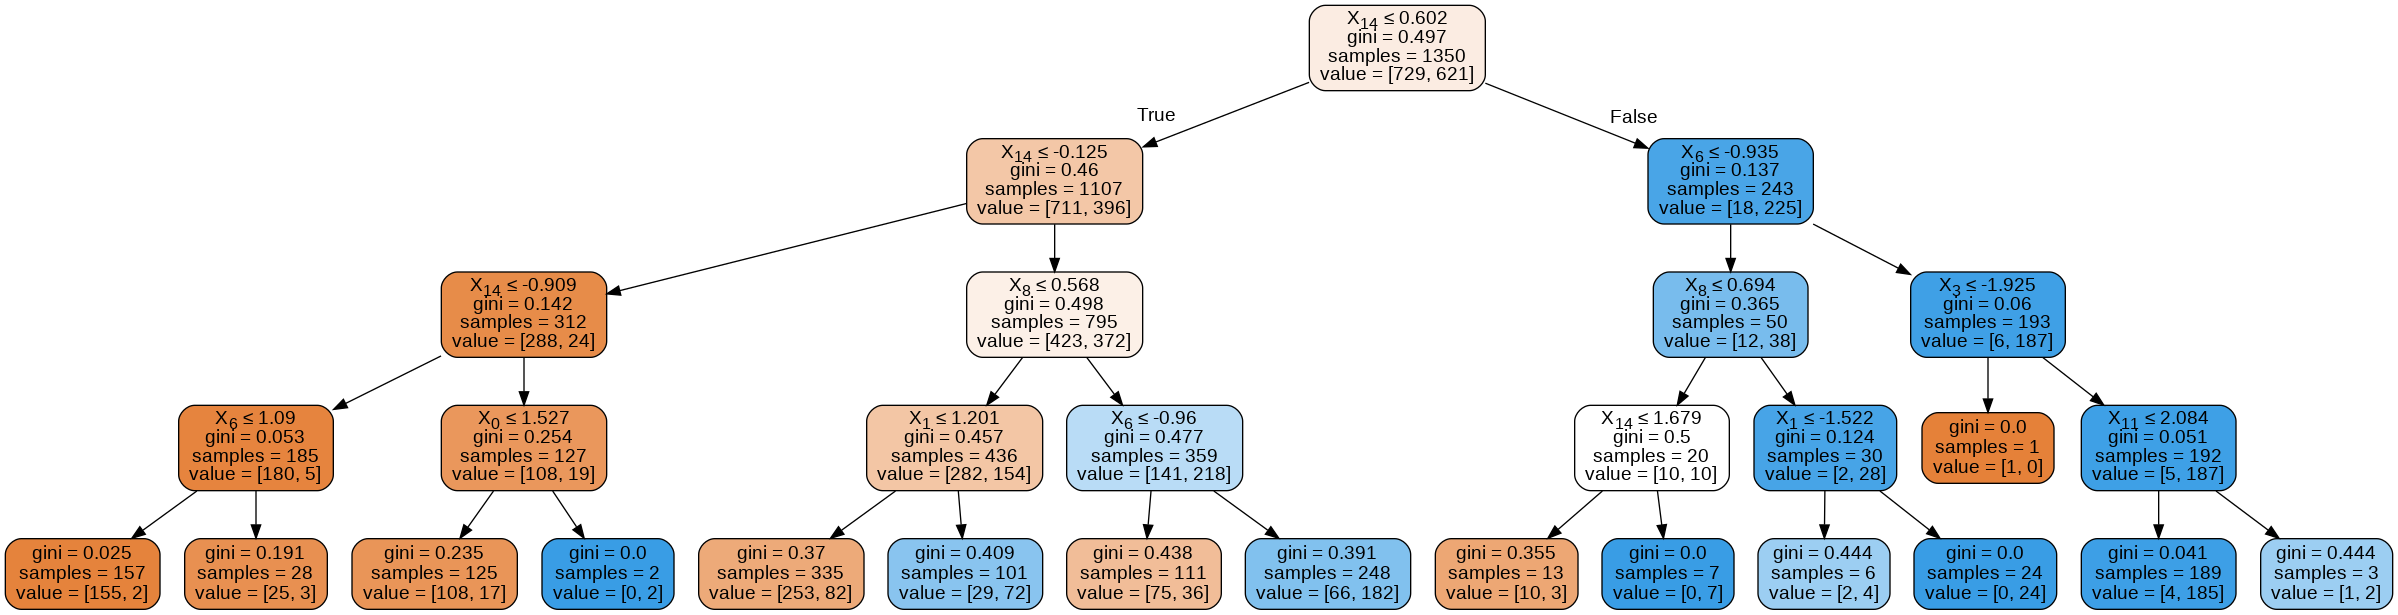

In [ ]:
#visulising the decision tree 

from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(LoanTree, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
#Reading unseen Test data 
df_unseen = pd.read_csv('/content/CE802_P2_Test.csv')
df_unseen.head(10)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,-8.67,-25.56,21,13.14,-7.45,5.55,10.29,-30.98,-476.72,2,-1.17,61.66,0.23,3.76,7.60,NaN
1,-8.31,-29.19,10,12.16,-7.66,5.22,10.22,-30.98,-422.72,2,-0.96,79.66,0.02,1.22,6.72,NaN
2,-0.84,-25.29,110,12.34,-3.72,20.70,17.32,-76.98,-778.72,20,11.10,-20.34,5.75,-1.97,NaN,NaN
3,0.90,-14.94,120,9.44,-3.44,28.05,15.52,-56.98,-858.72,20,6.33,229.66,8.05,-1.77,NaN,NaN
4,-0.33,-9.60,345,14.26,-3.32,34.80,15.07,-36.98,-458.72,20,12.18,129.66,9.80,-2.17,6.60,NaN
5,-7.32,-27.81,20,11.50,-7.61,4.38,10.27,-34.98,-448.72,2,-0.57,95.66,0.96,2.07,7.03,NaN
6,-2.40,-15.69,295,14.42,-3.56,16.65,15.52,-56.98,-608.72,20,7.80,189.66,9.25,-0.83,5.43,NaN
7,-10.77,-24.87,3,11.90,-7.19,0.99,10.38,-34.98,-442.72,2,-2.67,65.66,0.53,1.03,NaN,NaN
8,3.66,-12.96,325,13.28,-2.80,31.65,15.37,-36.98,-458.72,20,11.07,129.66,7.85,-3.28,6.63,NaN
9,-2.16,-33.81,210,8.48,-7.59,38.40,15.02,-56.98,-788.72,20,4.47,-30.34,5.35,-0.66,NaN,NaN


In [ ]:
df_unseen.describe

<bound method NDFrame.describe of          F1     F2   F3     F4    F5  ...     F12   F13   F14   F15  Class
0     -8.67 -25.56   21  13.14 -7.45  ...   61.66  0.23  3.76  7.60    NaN
1     -8.31 -29.19   10  12.16 -7.66  ...   79.66  0.02  1.22  6.72    NaN
2     -0.84 -25.29  110  12.34 -3.72  ...  -20.34  5.75 -1.97   NaN    NaN
3      0.90 -14.94  120   9.44 -3.44  ...  229.66  8.05 -1.77   NaN    NaN
4     -0.33  -9.60  345  14.26 -3.32  ...  129.66  9.80 -2.17  6.60    NaN
...     ...    ...  ...    ...   ...  ...     ...   ...   ...   ...    ...
1495   2.07 -12.18   55   9.10 -3.70  ...   89.66  7.45 -1.42  5.03    NaN
1496  -8.73 -28.92   20  14.86 -7.81  ...   85.66  0.02  1.75  4.87    NaN
1497 -20.43 -29.97   13  13.58 -7.32  ...  115.66  0.47  1.17   NaN    NaN
1498  -7.50 -26.49    9  14.08 -7.28  ...   95.66  0.29  1.79   NaN    NaN
1499   5.61 -13.26  265  15.62 -2.43  ...  219.66  5.20 -3.10   NaN    NaN

[1500 rows x 16 columns]>

In [ ]:
#seperating columns 
y_test_unseen = df_unseen.loc[:, 'Class'].to_numpy()
X_test_unseen = df_unseen.loc[:, df_unseen.columns != 'Class'].to_numpy()

In [ ]:
mean_unseen = np.nanmean(X_test_unseen[:,14])
X_test_unseen[np.isnan(X_test_unseen[:,14]), 14] = mean_unseen

df_check_unseen = pd.DataFrame(X_test_unseen)
df_check_unseen

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-8.67,-25.56,21.0,13.14,-7.45,5.55,10.29,-30.98,-476.72,2.0,-1.17,61.66,0.23,3.76,7.600000
1,-8.31,-29.19,10.0,12.16,-7.66,5.22,10.22,-30.98,-422.72,2.0,-0.96,79.66,0.02,1.22,6.720000
2,-0.84,-25.29,110.0,12.34,-3.72,20.70,17.32,-76.98,-778.72,20.0,11.10,-20.34,5.75,-1.97,5.816347
3,0.90,-14.94,120.0,9.44,-3.44,28.05,15.52,-56.98,-858.72,20.0,6.33,229.66,8.05,-1.77,5.816347
4,-0.33,-9.60,345.0,14.26,-3.32,34.80,15.07,-36.98,-458.72,20.0,12.18,129.66,9.80,-2.17,6.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,2.07,-12.18,55.0,9.10,-3.70,17.40,15.72,-66.98,-838.72,20.0,2.58,89.66,7.45,-1.42,5.030000
1496,-8.73,-28.92,20.0,14.86,-7.81,5.01,9.84,-34.98,-470.72,2.0,-2.55,85.66,0.02,1.75,4.870000
1497,-20.43,-29.97,13.0,13.58,-7.32,1.35,10.05,-30.98,-416.72,2.0,-4.02,115.66,0.47,1.17,5.816347
1498,-7.50,-26.49,9.0,14.08,-7.28,2.79,10.50,-30.98,-414.72,2.0,-2.28,95.66,0.29,1.79,5.816347


In [ ]:
#normalising unseen data 
X_test_unseen = stan_scal.transform(X_test_unseen)
X_test_unseen

array([[-0.5300486 , -0.65589815, -0.74163033, ..., -1.0399059 ,
         1.43988565,  2.52561954],
       [-0.48294919, -1.128887  , -0.83584085, ..., -1.10067148,
         0.42295568,  1.29459801],
       [ 0.49436353, -0.62071716,  0.02061847, ...,  0.55736076,
        -0.85421228,  0.03048812],
       ...,
       [-2.06862925, -1.23052097, -0.81014707, ..., -0.97045953,
         0.40293737,  0.03048812],
       [-0.37697552, -0.77707711, -0.84440544, ..., -1.02254431,
         0.65116437,  0.03048812],
       [ 1.33822792,  0.94679136,  1.3481304 , ...,  0.39821281,
        -1.30662601,  0.03048812]])

In [ ]:
#using SVM as that is the most accurate classifier accoridng to our cross-validation 

pred_test_unseen_log = clf.predict(X_test_unseen)
pred_test_unseen_log


array([1, 1, 0, ..., 1, 1, 0])

In [ ]:
df_pred_values = pd.DataFrame(pred_test_unseen_log)
df_pred_values[:20]

,0
0,1
1,1
2,0
3,0
4,1
5,1
6,0
7,1
8,1
9,0


In [ ]:
#setting and editing DataFrame 
df_unseen_final = pd.merge(df_unseen, df_pred_values, left_index=True, right_index=True)
df_unseen_final.drop('Class', axis = 1, inplace= True)
df_unseen_final.rename({ 0:'Class'}, axis = 1, inplace = True)
df_unseen_final['Class'] = df_unseen_final['Class'].replace([1, 0], [True, False])
df_unseen_final

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,-8.67,-25.56,21,13.14,-7.45,5.55,10.29,-30.98,-476.72,2,-1.17,61.66,0.23,3.76,7.60,True
1,-8.31,-29.19,10,12.16,-7.66,5.22,10.22,-30.98,-422.72,2,-0.96,79.66,0.02,1.22,6.72,True
2,-0.84,-25.29,110,12.34,-3.72,20.70,17.32,-76.98,-778.72,20,11.10,-20.34,5.75,-1.97,NaN,False
3,0.90,-14.94,120,9.44,-3.44,28.05,15.52,-56.98,-858.72,20,6.33,229.66,8.05,-1.77,NaN,False
4,-0.33,-9.60,345,14.26,-3.32,34.80,15.07,-36.98,-458.72,20,12.18,129.66,9.80,-2.17,6.60,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,2.07,-12.18,55,9.10,-3.70,17.40,15.72,-66.98,-838.72,20,2.58,89.66,7.45,-1.42,5.03,False
1496,-8.73,-28.92,20,14.86,-7.81,5.01,9.84,-34.98,-470.72,2,-2.55,85.66,0.02,1.75,4.87,False
1497,-20.43,-29.97,13,13.58,-7.32,1.35,10.05,-30.98,-416.72,2,-4.02,115.66,0.47,1.17,NaN,True
1498,-7.50,-26.49,9,14.08,-7.28,2.79,10.50,-30.98,-414.72,2,-2.28,95.66,0.29,1.79,NaN,True


In [ ]:
#saving DataFrame as csv

df_unseen_final.to_csv(r'CE802_P2_Test_Up.csv', index = False)